In [50]:
from river.datasets import synth
from river import cluster
from river import drift
import math
import numpy as np
import matplotlib.pyplot as plt
from river.utils import dict2numpy
from scipy.spatial import distance_matrix
from time import time
from river import stream
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer

In [51]:
ds = pd.read_csv('./covtype.csv',header=None)
ds.dropna(axis=0,inplace=True)
y = ds.pop(54)


In [52]:
pca = PCA(n_components=2)
pca.fit(ds)
ds = pca.transform(ds)

In [53]:
learner = cluster.CluStream(n_macro_clusters=3,max_micro_clusters=30)

In [54]:
labels = []
for x,_ in stream.iter_array(ds[:80000]):
    learner = learner.learn_one(x)
    labels.append(learner.predict_one(x))

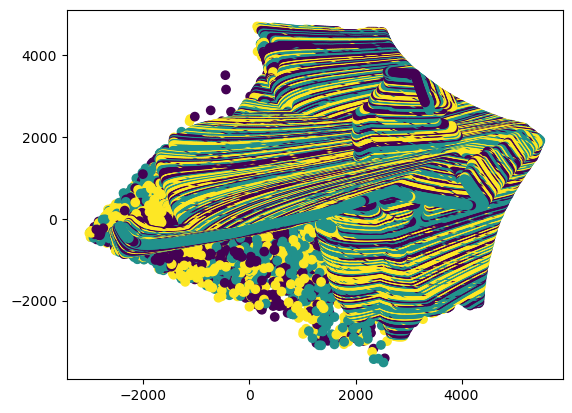

In [55]:
plt.scatter(ds[:80000,0],ds[:80000,1],c = labels)